참고문헌

- 파이썬 딥러닝 파이토치 (이경택, 방심수, 안상준 지음), 정보문화사

- https://gaussian37.github.io/dl-pytorch-snippets/

- 2023 KAIA 한국인공지능학회 / Introduction to pytorch (Hyunchul Kim) / 링크 : https://www.youtube.com/watch?v=YX-AgT-Kovg

- PyTorch로 시작하는 딥 러닝 입문 (유원준, 안상준 지음), 링크 : https://wikidocs.net/book/2788

# 2. logistic regression

- logistic regression 모형을 PyTorch를 이용하여 구현해보자.

## 2-1 Binary classification

- (예시) 합격을 1, 불합격을 0이라고 하였을 때

<img src='https://drive.google.com/uc?export=download&id=1KNCtmUrc3fzZxXz0DR4RrZJwIuAOyiKW' width="" height ="" /><br>

## 2-2 시그모이드 함수(Sigmoid function)

- 시그모이드 함수(Sigmoid function) :

$$ F(x) = sigmoid(Wx + b) = {1\over 1 + e^{-(Wx+b)}} = {e^{Wx+b} \over 1 + e^{Wx+b}} = \sigma (Wx+b)$$

  + 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용할 수 있습니다.

- 시그모이드 함수의 구현 :

In [1]:
import numpy as np              # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

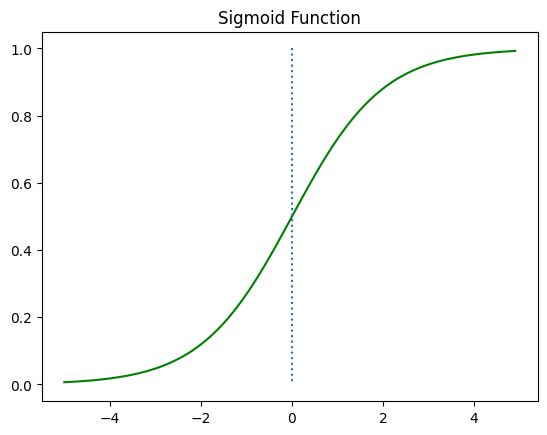

In [5]:
# W=1, b=0 일때의 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- `W`값의 변화에 따른 경사도의 변화는 다음과 같다 :

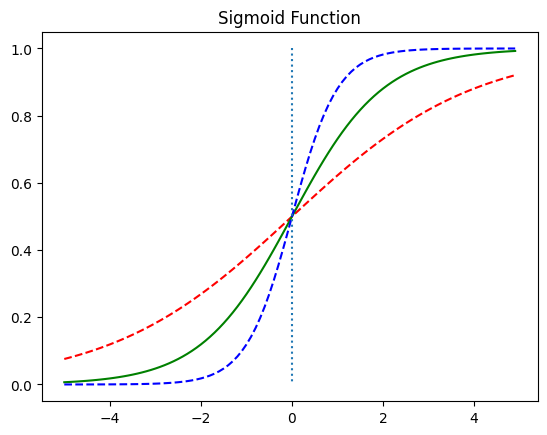

In [ ]:
# W값의 변화에 따른 경사도의 변화
x = np.arange(-5.0, 5.0, 0.1)

# W의 값이 0.5일때 (빨간색)
y1 = sigmoid(0.5*x)
plt.plot(x, y1, 'r', linestyle='--')

# W의 값이 1일때
y2 = sigmoid(x)
plt.plot(x, y2, 'g')

# W의 값이 2일때 (파란색)
y3 = sigmoid(2*x)
plt.plot(x, y3, 'b', linestyle='--')

plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- `b`값의 변화에 따른 좌, 우 이동

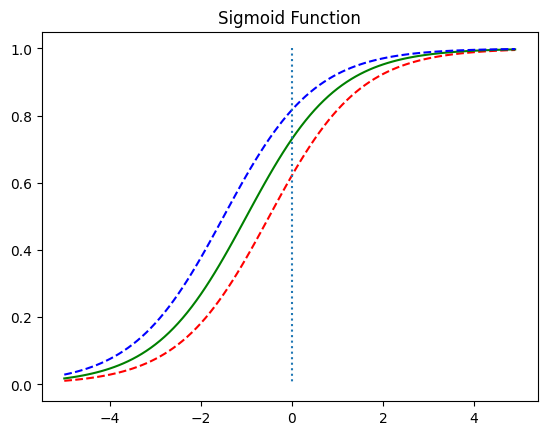

In [ ]:
# b값의 변화에 따른 좌, 우 이동
x = np.arange(-5.0, 5.0, 0.1)

# x + 0.5
y1 = sigmoid(x+0.5)
plt.plot(x, y1, 'r', linestyle='--')

# x + 1
y2 = sigmoid(x+1)
plt.plot(x, y2, 'g')

# x + 1.5
y3 = sigmoid(x+1.5)
plt.plot(x, y3, 'b', linestyle='--')

plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수를 이용한 분류
  + 시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴
  + 시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데 이 특성을 이용하여 분류 작업에 사용
  + 예를 들어 임계값을 0.5라고 정할 경우, 출력값이 0.5 이상이면 1(True) / 0.5이하면 0(False)으로 판단

## 2-3 비용 함수 (Cost function)

$$ cost(W,b) = -{1\over n}\sum_{i=1}^{n}{[y_ilog F(x_i) + (1-y_i) log (1-F(x_i))]} $$

- 최적의 $W$와 $b$를 찾기 위하여 $$ W^{(t+1)} = W^{(t)} - \alpha {\partial \over \partial W} cost(W,b) $$ $$ b^{(t+1)} = b^{(t)} - \alpha {\partial \over \partial b} cost(W,b) $$

___코드 구현 (전체)___

In [6]:
# import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
# 데이터 생성
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # x가 2차원
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [13]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    # x_train : 6x2, W : 2x1 -> 6x1차원 + 상수 b braodcasting
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
    cost       = F.binary_cross_entropy(hypothesis, y_train)

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/10000 Cost: 0.693147
Epoch  100/10000 Cost: 0.578086
Epoch  200/10000 Cost: 0.535207
Epoch  300/10000 Cost: 0.505647
Epoch  400/10000 Cost: 0.484024
Epoch  500/10000 Cost: 0.467288
Epoch  600/10000 Cost: 0.453674
Epoch  700/10000 Cost: 0.442127
Epoch  800/10000 Cost: 0.431998
Epoch  900/10000 Cost: 0.422874
Epoch 1000/10000 Cost: 0.414490
Epoch 1100/10000 Cost: 0.406666
Epoch 1200/10000 Cost: 0.399282
Epoch 1300/10000 Cost: 0.392253
Epoch 1400/10000 Cost: 0.385521
Epoch 1500/10000 Cost: 0.379043
Epoch 1600/10000 Cost: 0.372787
Epoch 1700/10000 Cost: 0.366732
Epoch 1800/10000 Cost: 0.360859
Epoch 1900/10000 Cost: 0.355154
Epoch 2000/10000 Cost: 0.349607
Epoch 2100/10000 Cost: 0.344209
Epoch 2200/10000 Cost: 0.338953
Epoch 2300/10000 Cost: 0.333833
Epoch 2400/10000 Cost: 0.328842
Epoch 2500/10000 Cost: 0.323977
Epoch 2600/10000 Cost: 0.319233
Epoch 2700/10000 Cost: 0.314605
Epoch 2800/10000 Cost: 0.310091
Epoch 2900/10000 Cost: 0.305687
Epoch 3000/10000 Cost: 0.301389
Epoch 31

- training data를 그대로 활용하여 학습된 모형으로 예측하게 되면 다음과 같다 :

In [19]:
# 각 i별로 1일 확률
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.0299],
        [0.1577],
        [0.3007],
        [0.7833],
        [0.9408],
        [0.9806]], grad_fn=<SigmoidBackward0>)


In [20]:
# 확률이 0.5 이상이면 1로 예측
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [21]:
# 실제 훈련데이터의 output을 확인해보면
y_train

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

- 학습된 파라미터는 다음과 같다

In [22]:
# estimated parameter
print(W,b)

tensor([[1.4803],
        [0.3243]], requires_grad=True) tensor([-5.6092], requires_grad=True)


___코드 구현 (nn.Module 활용)___

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
# 데이터 생성
torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

- `nn.Sequential()`
  + `nn.Module` 층을 차례로 쌓을 수 있도록 합니다.
  + $Wx + b$와 같은 수식과 시그모이드 함수 등과 같은 여러 함수들을 연결해주는 역할을 합니다.
  + 이를 이용해서 로지스틱 회귀를 구현하면 다음과 같습니다.

In [25]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

- 로지스틱 회귀는 다음과 같은 단순한 형태의 인공 신경망으로 간주할 수 있습니다.
- 즉, $$H(x) = \sigma(Wx + b) $$ 가 되며,
- `nn.Sequential()`내에서 `nn.Linear(2, 1)`이 $Wx +b$에 해당이 되고, `nn.Sigmoid()`이 $\sigma()$에 해당이 됩니다

<img src='https://drive.google.com/uc?export=download&id=1w10K5Gg_kh0H7DXVcrQuF6os1vtvQI40' width="" height ="" /><br>

- 현재 W와 b는 랜덤 초기화가 된 상태입니다.
- 훈련 데이터를 넣어 예측값을 확인해봅시다.

In [26]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # F(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        # 예측값이 0.5를 넘으면 True로 간주
        prediction = hypothesis >= torch.FloatTensor([0.5])

        # 실제값과 일치하는 경우만 True로 간주
        correct_prediction = prediction.float() == y_train

        # 정확도를 계산
        accuracy = correct_prediction.sum().item() / len(correct_prediction)

        # 각 에포크마다 정확도를 출력
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/10000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/10000 Cost: 0.535479 Accuracy 83.33%
Epoch   20/10000 Cost: 0.532031 Accuracy 83.33%
Epoch   30/10000 Cost: 0.528960 Accuracy 83.33%
Epoch   40/10000 Cost: 0.526097 Accuracy 83.33%
Epoch   50/10000 Cost: 0.523372 Accuracy 83.33%
Epoch   60/10000 Cost: 0.520752 Accuracy 83.33%
Epoch   70/10000 Cost: 0.518219 Accuracy 83.33%
Epoch   80/10000 Cost: 0.515766 Accuracy 83.33%
Epoch   90/10000 Cost: 0.513387 Accuracy 83.33%
Epoch  100/10000 Cost: 0.511077 Accuracy 83.33%
Epoch  110/10000 Cost: 0.508832 Accuracy 83.33%
Epoch  120/10000 Cost: 0.506649 Accuracy 83.33%
Epoch  130/10000 Cost: 0.504525 Accuracy 83.33%
Epoch  140/10000 Cost: 0.502458 Accuracy 83.33%
Epoch  150/10000 Cost: 0.500445 Accuracy 83.33%
Epoch  160/10000 Cost: 0.498483 Accuracy 83.33%
Epoch  170/10000 Cost: 0.496570 Accuracy 83.33%
Epoch  180/10000 Cost: 0.494704 Accuracy 83.33%
Epoch  190/10000 Cost: 0.492883 Accuracy 83.33%
Epoch  200/10000 Cost: 0.491104 Accuracy

- 기존의 훈련 데이터를 입력하여 예측값을 확인해보겠습니다.
  + 0.5를 넘으면 True, 그보다 낮으면 False로 간주합니다.

In [ ]:
model(x_train)

tensor([[0.0296],
        [0.1572],
        [0.2991],
        [0.7840],
        [0.9412],
        [0.9807]], grad_fn=<SigmoidBackward0>)

- 훈련 후의 W와 b의 값을 출력해보겠습니다.

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.4842, 0.3282]], requires_grad=True), Parameter containing:
tensor([-5.6320], requires_grad=True)]


___코드 구현 (nn.Module 및 클래스 활용)___

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [28]:
# 데이터 생성
torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [29]:
# 클래스를 활용하여 구현
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [30]:
# 모형 선언
model = BinaryClassifier()

In [31]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    # F(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # Gradient descent
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:

        # 예측값이 0.5를 넘으면 True로 간주
        prediction = hypothesis >= torch.FloatTensor([0.5])

        # 실제값과 일치하는 경우만 True로 간주
        correct_prediction = prediction.float() == y_train

        # 정확도를 계산
        accuracy = correct_prediction.sum().item() / len(correct_prediction)

        # 각 에포크마다 정확도를 출력
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/10000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/10000 Cost: 0.535479 Accuracy 83.33%
Epoch   20/10000 Cost: 0.532031 Accuracy 83.33%
Epoch   30/10000 Cost: 0.528960 Accuracy 83.33%
Epoch   40/10000 Cost: 0.526097 Accuracy 83.33%
Epoch   50/10000 Cost: 0.523372 Accuracy 83.33%
Epoch   60/10000 Cost: 0.520752 Accuracy 83.33%
Epoch   70/10000 Cost: 0.518219 Accuracy 83.33%
Epoch   80/10000 Cost: 0.515766 Accuracy 83.33%
Epoch   90/10000 Cost: 0.513387 Accuracy 83.33%
Epoch  100/10000 Cost: 0.511077 Accuracy 83.33%
Epoch  110/10000 Cost: 0.508832 Accuracy 83.33%
Epoch  120/10000 Cost: 0.506649 Accuracy 83.33%
Epoch  130/10000 Cost: 0.504525 Accuracy 83.33%
Epoch  140/10000 Cost: 0.502458 Accuracy 83.33%
Epoch  150/10000 Cost: 0.500445 Accuracy 83.33%
Epoch  160/10000 Cost: 0.498483 Accuracy 83.33%
Epoch  170/10000 Cost: 0.496570 Accuracy 83.33%
Epoch  180/10000 Cost: 0.494704 Accuracy 83.33%
Epoch  190/10000 Cost: 0.492883 Accuracy 83.33%
Epoch  200/10000 Cost: 0.491104 Accuracy

In [ ]:
model(x_train)

tensor([[0.0296],
        [0.1572],
        [0.2991],
        [0.7840],
        [0.9412],
        [0.9807]], grad_fn=<SigmoidBackward0>)

In [ ]:
model(x_train) >= torch.FloatTensor([0.5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.4842, 0.3282]], requires_grad=True), Parameter containing:
tensor([-5.6320], requires_grad=True)]
